# Regresja Liniowa

### Generowanie danych

In [738]:
import numpy as np
import pandas as pd
# 1d
n = 100
X = np.random.rand(n)
y = 4 + 3 * X + np.random.randn(n) / 10
pd.DataFrame({"zmienna_1": X, "target": y}).to_csv("dane_1.csv", index=False)

y = 4 + 3 * X + np.random.randn(n) / 3
pd.DataFrame({"zmienna_1": X, "target": y}).to_csv("dane_1_h.csv", index=False)

# 2d
n = 100
X1 = np.random.rand(n)
X2 = np.random.rand(n)
y = 4 -3*X1 + 5*X2 + np.random.randn(n) / 100
pd.DataFrame({"zmienna_1": X1, 
              "zmienna_2": X2, 
              "target": y}).to_csv("dane_2.csv", index=False)

# non linear
n = 100
X = np.random.uniform(-10, 10, n)
y =  X*X + 2*X -3 + 5 * np.random.randn(n)
pd.DataFrame({"zmienna_1": X, "target": y}).to_csv("dane_sq.csv", index=False)

n = 100
X = np.random.uniform(-10, 10, n)
y =  X**3 + 3*X*X + 2*X -3 + 50 * np.random.randn(n)
pd.DataFrame({"zmienna_1": X, "target": y}).to_csv("dane_cb.csv", index=False)

n = 10
X = np.random.uniform(-5, 5, n)
y =  np.sin(X) + np.random.randn(n) * 0.1
pd.DataFrame({"zmienna_1": X, "target": y}).to_csv("dane_pl.csv", index=False)

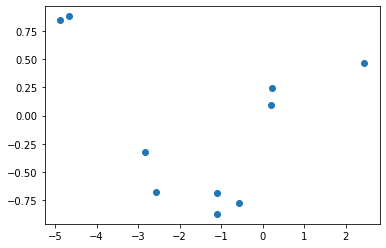

In [739]:
plt.scatter(X, y)

### Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

In [2]:
# Load data

df = pd.read_csv("dane_1.csv")
df.head(5)

,zmienna_1,target
0,0.136786,4.338782
1,0.298402,4.768205
2,0.844840,6.508441
3,0.570854,5.712524
4,0.773816,6.479009


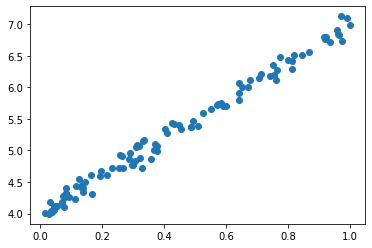

In [7]:
# Visualisation
plt.scatter(df['zmienna_1'], df['target'])
plt.show()

# # Visualisation by pandas
# df.plot.scatter('zmienna_1', 'target')
# plt.show()

In [8]:
# Add constant term
df['intercept'] = 1
df.head()

,zmienna_1,target,intercept
0,0.136786,4.338782,1
1,0.298402,4.768205,1
2,0.844840,6.508441,1
3,0.570854,5.712524,1
4,0.773816,6.479009,1


In [12]:
# Create variables
X = df[['zmienna_1', 'intercept']].values
y = df[['target']].values
print(f"X: \n{X[:10]}")
print(f"y: \n{y[:10]}")

X: 
[[0.13678632 1.        ]
 [0.29840223 1.        ]
 [0.84483987 1.        ]
 [0.5708542  1.        ]
 [0.77381616 1.        ]
 [0.44797001 1.        ]
 [0.31007815 1.        ]
 [0.76312579 1.        ]
 [0.67559958 1.        ]
 [0.57367385 1.        ]]
y: 
[[4.33878203]
 [4.76820512]
 [6.50844068]
 [5.712524  ]
 [6.47900949]
 [5.40429651]
 [5.08215281]
 [6.27505713]
 [6.11290291]
 [5.74180752]]


$\hat{\theta} = (X^T \cdot X) ^ {-1} \cdot X^T \cdot y$

In [13]:
# Find coeficients - OLS
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([[2.99604297],
       [4.00222644]])

In [14]:
# Prediction
y_pred = theta[1] + theta[0] * df['zmienna_1']

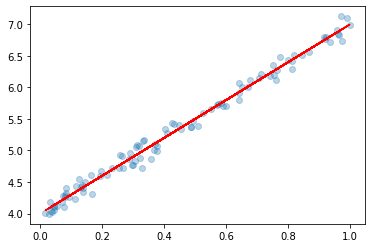

In [15]:
# Visualisation
plt.scatter(df['zmienna_1'], df['target'], alpha=0.3)
plt.plot(df['zmienna_1'], y_pred, c='red')
plt.show()

In [17]:
# Calcualte residuals
error = y_pred.values.reshape(-1, 1) - y
error = np.round(error, 5)
np.round(error.sum(), 4)

0.0

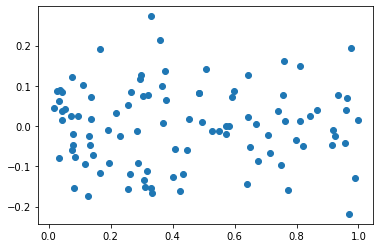

In [18]:
# Plot residuals
plt.scatter(df['zmienna_1'], error)

### Ordinary Least Squares -  `statsmodel`

https://www.statsmodels.org/stable/index.html

http://net-informations.com/ds/mla/ols.htm

In [19]:
# !pip install statsmodels

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [28]:
df = pd.read_csv("Salary_Data.csv")
# df = pd.read_csv("dane_1.csv")
# df = pd.read_csv("dane_sq.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
x_var = 'YearsExperience'
target = 'Salary'
X = df[x_var]
Y = df[target]

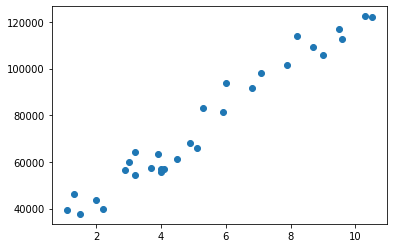

In [30]:
plt.scatter(X, Y)

In [31]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        10:16:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

eval_env: 1


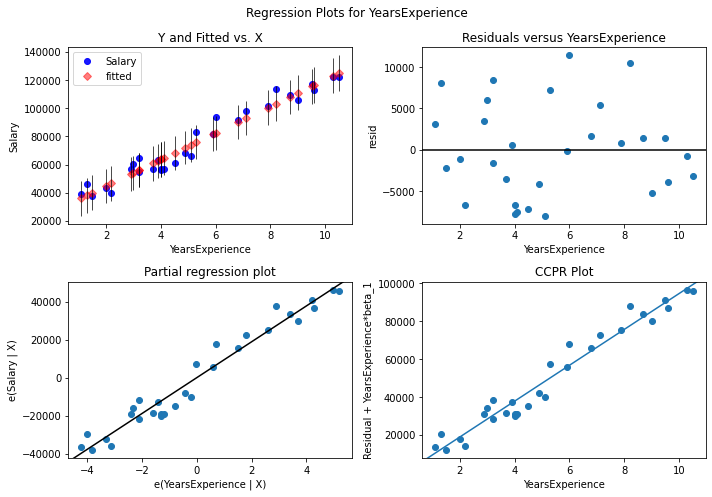

In [32]:
fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, x_var, fig=fig)
plt.show()

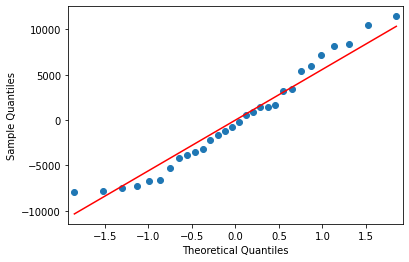

In [33]:
res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

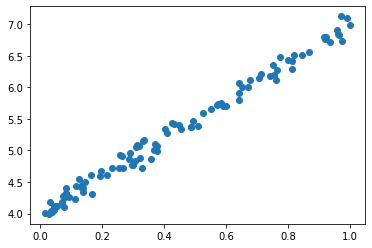

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8313.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.44e-96
Time:                        10:16:38   Log-Likelihood:                 90.902
No. Observations:                 100   AIC:                            -177.8
Df Residuals:                      98   BIC:                            -172.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0022      0.017    230.049      0.0

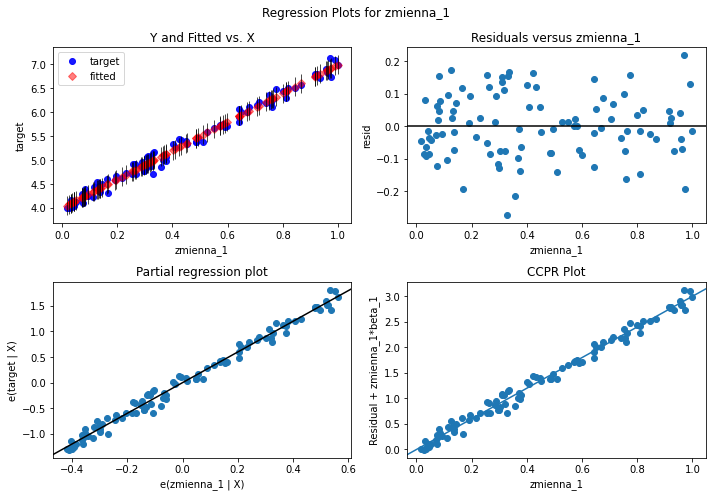

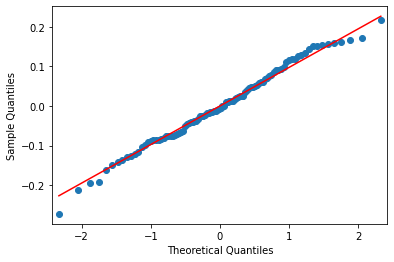

In [35]:
df = pd.read_csv("dane_1.csv")

x_var = 'zmienna_1'
target = 'target'
X = df[x_var]
Y = df[target]

plt.scatter(X, Y)
plt.show()

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, x_var, fig=fig)
plt.show()

res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

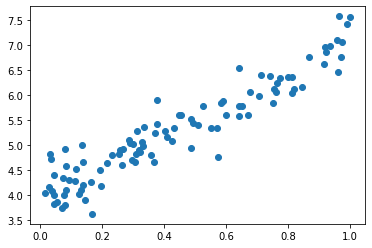

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     778.1
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           2.07e-48
Time:                        10:16:56   Log-Likelihood:                -27.913
No. Observations:                 100   AIC:                             59.83
Df Residuals:                      98   BIC:                             65.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9822      0.057     69.764      0.0

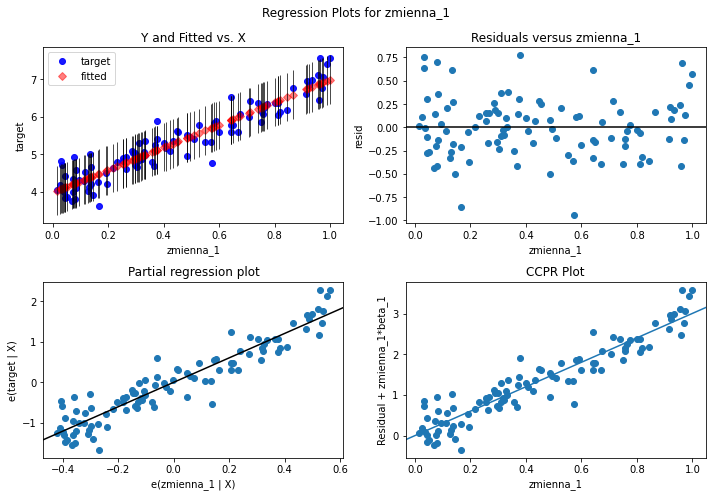

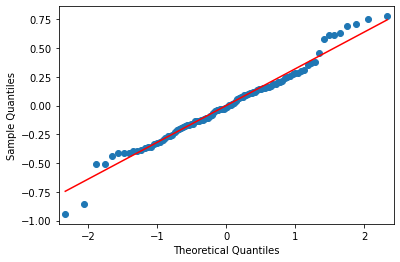

In [36]:
df = pd.read_csv("dane_1_h.csv")

x_var = 'zmienna_1'
target = 'target'
X = df[x_var]
Y = df[target]

plt.scatter(X, Y)
plt.show()

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, x_var, fig=fig)
plt.show()

res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

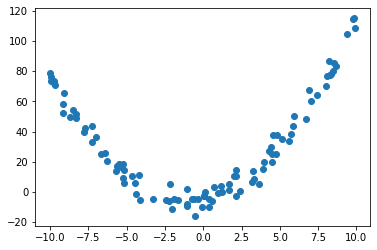

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     5.130
Date:                Thu, 14 Apr 2022   Prob (F-statistic):             0.0257
Time:                        10:21:01   Log-Likelihood:                -489.63
No. Observations:                 100   AIC:                             983.3
Df Residuals:                      98   BIC:                             988.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8912      3.274      9.129      0.0

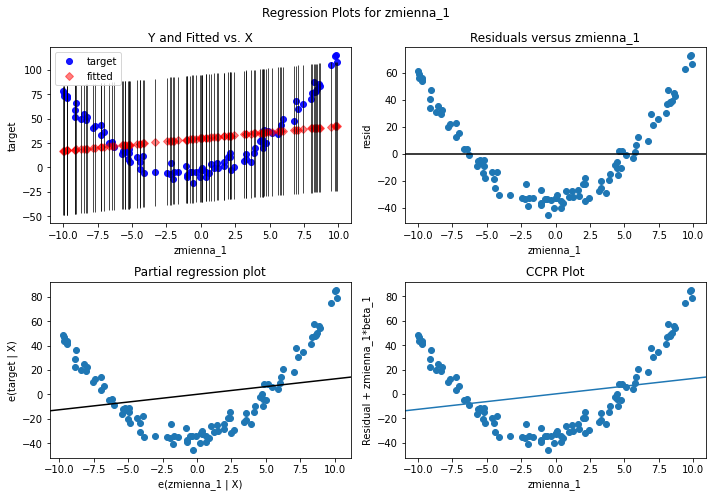

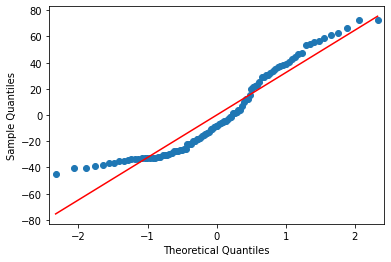

In [51]:
df = pd.read_csv("dane_sq.csv")

x_var = 'zmienna_1'
target = 'target'
X = df[x_var]
Y = df[target]

plt.scatter(X, Y)
plt.show()

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, x_var, fig=fig)
plt.show()

res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

In [52]:
np.round(model.resid.sum(), 4)

0.0

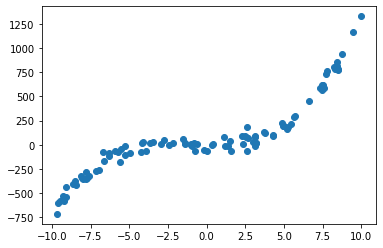

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     375.2
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           2.81e-35
Time:                        10:20:18   Log-Likelihood:                -658.58
No. Observations:                 100   AIC:                             1321.
Df Residuals:                      98   BIC:                             1326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.1463     17.735      4.801      0.0

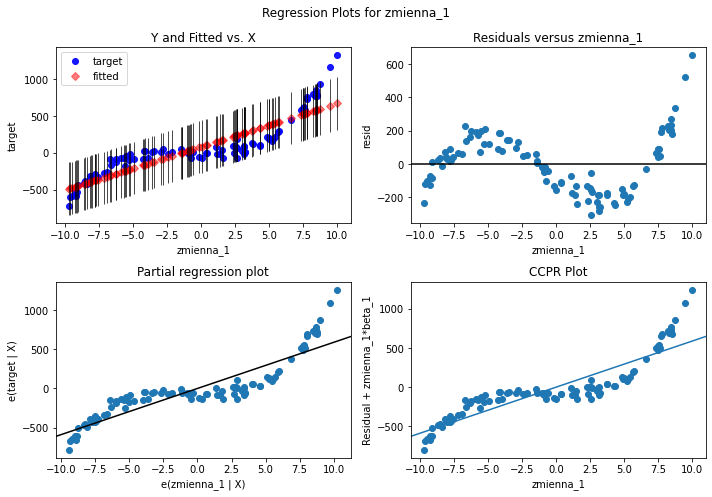

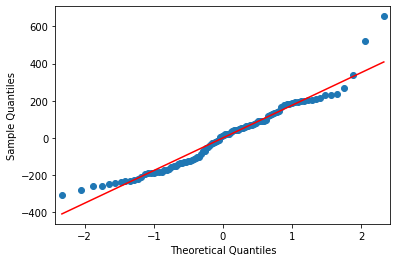

In [46]:
df = pd.read_csv("dane_cb.csv")

x_var = 'zmienna_1'
target = 'target'
X = df[x_var]
Y = df[target]

plt.scatter(X, Y)
plt.show()

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, x_var, fig=fig)
plt.show()

res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

In [49]:
np.round(model.resid.sum(), 4)

0.0

### Regresja wielowymiarowa

In [601]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State
0,1.7,1.4,4.7,1.9,New York
1,1.6,1.5,4.4,1.9,California
2,1.5,1.0,4.1,1.9,Florida
3,1.4,1.2,3.8,1.8,New York
4,1.4,0.9,3.7,1.7,Florida


In [602]:
# df2 = (df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']] / 100).round(1)
# df2['State'] = df['State'] 
# df2.to_csv("50_Startups.csv", index=False)

### Dummy variable trap

In [603]:
X_d.columns

Index(['intercept', 'R&D Spend', 'Administration', 'Marketing Spend',
       'State_Florida', 'State_New York'],
      dtype='object')

In [622]:
X_d = pd.get_dummies(df)
X_d['intercept']  = 1
# X_d = X_d[['intercept', 'R&D Spend', 'Administration',  'Marketing Spend', 'Profit',
#        'State_California', 'State_Florida', 'State_New York']]

X_d.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York,intercept
0,1.7,1.4,4.7,1.9,0,0,1,1
1,1.6,1.5,4.4,1.9,1,0,0,1
2,1.5,1.0,4.1,1.9,0,1,0,1
3,1.4,1.2,3.8,1.8,0,0,1,1
4,1.4,0.9,3.7,1.7,0,1,0,1


In [623]:
y = X_d.pop('Profit').values.reshape(-1, 1)
X = X_d.values

In [624]:
# X = sm.add_constant(X)

In [625]:
X = X.astype('float64')
y = y.astype('float64')
X.dtype

dtype('float64')

In [626]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

LinAlgError: Singular matrix

In [627]:
np.linalg.det(X.T.dot(X))

0.0

In [628]:
X_d.drop('State_California', axis=1, inplace=True)
X = X_d.values

In [630]:
print(f"Wyznacznik: {np.linalg.det(X.T.dot(X))}")
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

Wyznacznik: 4986659.022899932


array([[ 0.82412269],
       [-0.05339375],
       [ 0.02612216],
       [-0.00447975],
       [-0.01217616],
       [ 0.53452865]])

#### Feature selection - Backward elimination

In [631]:
X.shape

(50, 6)

In [632]:
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)

In [633]:
regressor_OLS = sm.OLS(y, X_opt).fit()

In [636]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     159.2
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           5.21e-27
Time:                        15:16:38   Log-Likelihood:                 48.681
No. Observations:                  50   AIC:                            -85.36
Df Residuals:                      44   BIC:                            -73.89
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8241      0.048     17.022      0.000       0.727       0.922
x2            -0.0534      0.054     -0.997      0.324      -0.161       0.055
x3             0.0261      0.018      1.477      0.147      -0.010       0.062
x4            -0.0045      0.035     -0.129      0.898      -0.075       0.066
x5            -0.0122      0.034     -0.362      0.719      -0.080       0.056
const          0.5345      0.071      7.553      0.000       0.392       0.677
==============================================================================
Omnibus:                       25.473   Durbin-Watson:                   1.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.578
Skew:                          -1.398   Prob(JB):                     3.14e-13
Kurtosis:                       7.452   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Zwracamy uwage na `p-value`. \
Usuwamy zmienną z najwyższym `p-value` powyżej zakładanego poziomu istotności (najczęściej 0.05).

In [637]:
X_opt = X[:, [0, 1, 2, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           3.44e-28
Time:                        15:16:55   Log-Likelihood:                 48.672
No. Observations:                  50   AIC:                            -87.34
Df Residuals:                      45   BIC:                            -77.78
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8242      0.048     17.212      0.000       0.728       0.921
x2            -0.0535      0.053     -1.010      0.318      -0.160       0.053
x3             0.0258      0.017      1.490      0.143      -0.009       0.061
x4            -0.0100      0.029     -0.346      0.731      -0.068       0.048
const          0.5332      0.069      7.702      0.000       0.394       0.673
==============================================================================
Omnibus:                       25.154   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.515
Skew:                          -1.392   Prob(JB):                     8.81e-13
Kurtosis:                       7.348   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [638]:
X_opt = X[:, [0, 1, 2, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     276.4
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           2.01e-29
Time:                        15:17:13   Log-Likelihood:                 48.605
No. Observations:                  50   AIC:                            -89.21
Df Residuals:                      46   BIC:                            -81.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8223      0.047     17.451      0.000       0.727       0.917
x2            -0.0528      0.052     -1.007      0.319      -0.158       0.053
x3             0.0264      0.017      1.551      0.128      -0.008       0.061
const          0.5289      0.067      7.840      0.000       0.393       0.665
==============================================================================
Omnibus:                       24.122   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.671
Skew:                          -1.354   Prob(JB):                     9.93e-12
Kurtosis:                       7.122   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [640]:
X_opt = X[:, [0, 2, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     414.0
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.43e-30
Time:                        15:17:55   Log-Likelihood:                 48.060
No. Observations:                  50   AIC:                            -90.12
Df Residuals:                      47   BIC:                            -84.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8041      0.044     18.473      0.000       0.717       0.892
x2             0.0316      0.016      1.942      0.058      -0.001       0.064
const          0.4672      0.028     16.549      0.000       0.410       0.524
==============================================================================
Omnibus:                       24.865   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.955
Skew:                          -1.395   Prob(JB):                     3.17e-12
Kurtosis:                       7.199   Cond. No.                         9.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [643]:
X_d.iloc[:, [0, 2, 5]]

,R&D Spend,Marketing Spend,intercept
0,1.7,4.7,1
1,1.6,4.4,1
2,1.5,4.1,1
3,1.4,3.8,1
4,1.4,3.7,1
5,1.3,3.6,1
6,1.3,1.3,1
7,1.3,3.2,1
8,1.2,3.1,1
9,1.2,3.0,1


In [644]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [645]:
np.round(m.coef_, 5)

array([[ 0.82412, -0.05339,  0.02612, -0.00448, -0.01218,  0.     ]])

### Regresja wielomianowa

In [646]:
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv("dane_sq.csv")

X = df[['zmienna_1']].values
y = df[['target']].values

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [647]:
print(f"Coeficients: {model.coef_}")
print(f"Intercept:   {model.intercept_}")

Coeficients: [[1.26521838]]
Intercept:   [29.89117557]


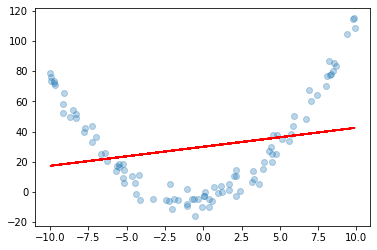

In [648]:
y_pred = model.predict(X)
plt.scatter(df['zmienna_1'], df['target'], alpha=0.3)
plt.plot(df['zmienna_1'], y_pred, c='red')
plt.show()

In [649]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
np.set_printoptions(suppress=True)

In [650]:
X[0] ** 2

array([17.88209001])

In [652]:
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X_poly[:10]

array([[-4.22872203, 17.88209001],
       [-9.13961313, 83.53252825],
       [ 2.11418976,  4.46979836],
       [ 3.26331377, 10.64921674],
       [ 8.67350858, 75.2297511 ],
       [ 6.93686236, 48.12005936],
       [ 3.63175455, 13.18964111],
       [-0.75470822,  0.5695845 ],
       [-1.03813605,  1.07772646],
       [-3.2984884 , 10.88002573]])

In [659]:
X_poly = sm.add_constant(X_poly)
model = sm.OLS(y, X_poly).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2227.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           8.73e-82
Time:                        15:41:55   Log-Likelihood:                -299.77
No. Observations:                 100   AIC:                             605.5
Df Residuals:                      97   BIC:                             613.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5164      0.723     -6.245      0.0

eval_env: 1


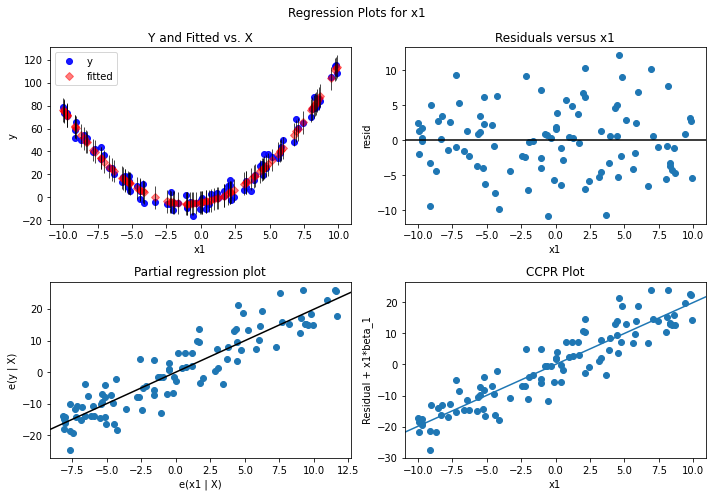

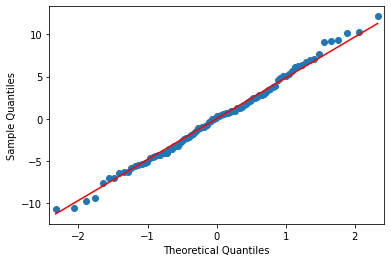

eval_env: 1


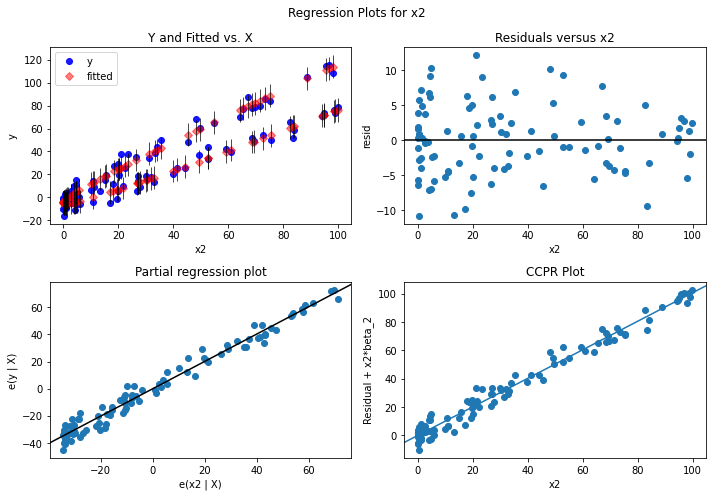

In [664]:
fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, 'x1', fig=fig)
plt.show()

res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, 'x2', fig=fig)
plt.show()

In [653]:
model = LinearRegression()
model.fit(X_poly, y)

print(f"Coeficients: {model.coef_}")
print(f"Intercept:   {model.intercept_}")

Coeficients: [[1.98760945 1.00744391]]
Intercept:   [-4.51644827]


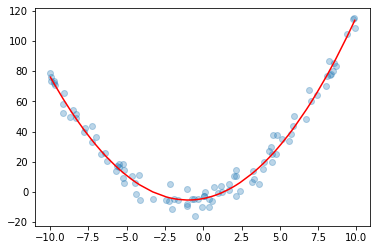

In [654]:
y_pred = model.predict(X_poly)

xs, ys = zip(*sorted(zip(X, y_pred)))

plt.scatter(df['zmienna_1'], df['target'], alpha=0.3)
plt.plot(xs, ys, c='red')
plt.show()

### Gradient prosty

In [669]:
import pandas as pd

df = pd.read_csv("dane_1.csv")
df['intercept'] = 1
X = df[['zmienna_1', 'intercept']].values
y = df[['target']].values

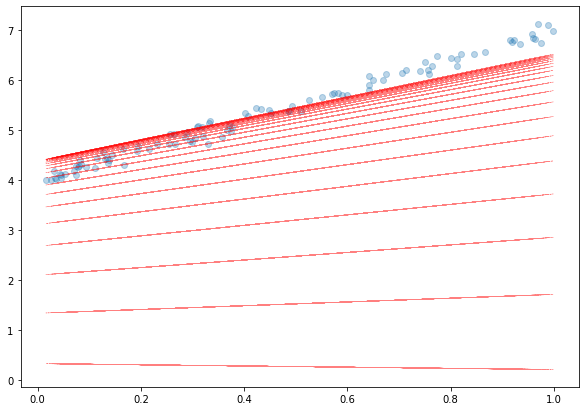

[[2.1336442 ]
 [4.38178296]]


In [670]:
eta = 0.1  # learning rate
n_iterations = 20
m = df.shape[0]

theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10, 7))
plt.scatter(df['zmienna_1'], df['target'], alpha=0.3)

for iteration in range(n_iterations):
    gradients = 2/m * X.T.dot(X.dot(theta) - y)
    theta = theta - eta * gradients
    
    y_pred = theta[1] + theta[0] * df['zmienna_1']
    plt.plot(df['zmienna_1'], y_pred, c='red', linewidth=0.5,
             linestyle='--', alpha=0.5)

plt.show()
print(theta)

# Ocena jakości modelu

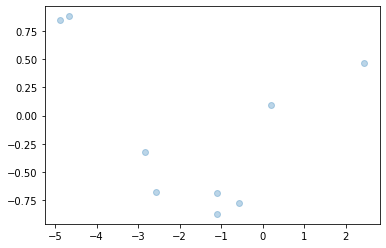

In [740]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

import pandas as pd

df = pd.read_csv("dane_pl.csv")[:-1]

X = df[['zmienna_1']].values
y = df[['target']].values

plt.scatter(X, y, alpha=0.3)
plt.show()

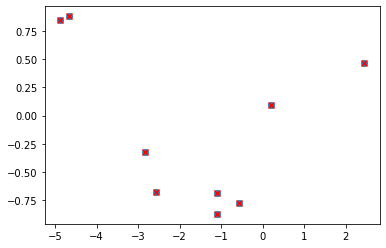

In [745]:
pol = PolynomialFeatures(degree=9, include_bias=False)
X_poly = pol.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
xs, ys = zip(*sorted(zip(X, y_pred)))
plt.scatter(df['zmienna_1'], df['target'], alpha=0.9)
plt.scatter(xs, ys, c='red', marker='x')

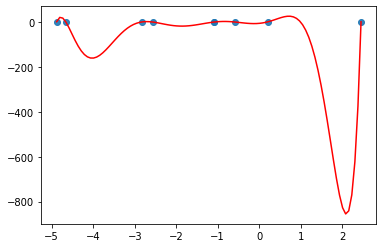

In [746]:
x_lin = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_lin_pol = pol.transform(x_lin)
y_pr_lin = model.predict(x_lin_pol)
plt.scatter(df['zmienna_1'], df['target'], alpha=0.9)
plt.plot(x_lin, y_pr_lin, c='red')

In [743]:
results = {}

for i in range(1, 21):
    pol = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = pol.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    
    results[f"degree: {i}"] = {"r2_score": r2_score(y, y_pred),
                               "mean_squared_error": mean_squared_error(y, y_pred)}

In [744]:
for i in results.items():
    print(i)

('degree: 1', {'r2_score': 0.09406590284226635, 'mean_squared_error': 0.402159545707191})
('degree: 2', {'r2_score': 0.8657853358065224, 'mean_squared_error': 0.0595801709513251})
('degree: 3', {'r2_score': 0.9094632186714562, 'mean_squared_error': 0.04019081626700163})
('degree: 4', {'r2_score': 0.9806503644974542, 'mean_squared_error': 0.008589632124144089})
('degree: 5', {'r2_score': 0.9807352464580602, 'mean_squared_error': 0.008551951578922155})
('degree: 6', {'r2_score': 0.9854033453680132, 'mean_squared_error': 0.006479703119754087})
('degree: 7', {'r2_score': 0.9956338173573686, 'mean_squared_error': 0.0019382226958276627})
('degree: 8', {'r2_score': 0.9999999999999999, 'mean_squared_error': 2.4669637831478637e-17})
('degree: 9', {'r2_score': 1.0, 'mean_squared_error': 1.3188573673967132e-17})
('degree: 10', {'r2_score': 0.9999999999999999, 'mean_squared_error': 2.6387459414352305e-17})
('degree: 11', {'r2_score': 0.9999999999999994, 'mean_squared_error': 2.59993976258384e-16})

AttributeError: 'PathCollection' object has no property 'm'

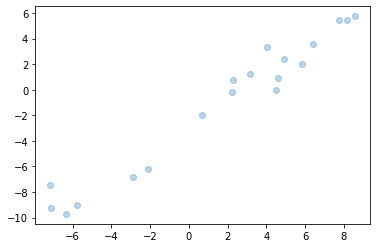

In [673]:
degree = 13
pol = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = pol.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

xs, ys = zip(*sorted(zip(X, y_pred)))
plt.scatter(df['zmienna_1'], df['target'], alpha=0.3)
plt.scatter(xs, ys, c='red', m='x')


# xc = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
# yc = model.predict(pol.transform(x_cont))

# plt.plot(xc, yc, alpha = 0.3)
# plt.show()